The exploratory data analysis presented below is the outcome of the first attempt to understand how the property tax varies depending on which factor, by focusing on one zip code. 11961 in Queens was randomly selected.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, math

The housing data below for ZIP code 11961 were collected with Zillow API + Zillow webpage scraping.

In [3]:
df = pd.read_csv('11961_chart_v2C.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 25 columns):
zpid                 498 non-null int64
street               498 non-null object
latitude             498 non-null float64
longitude            498 non-null float64
useCode              498 non-null object
taxAssessmentYear    484 non-null float64
taxAssessment        483 non-null float64
yearBuilt            466 non-null float64
lotSizeSqFt          472 non-null float64
finishedSqFt         439 non-null float64
bathrooms            322 non-null float64
bedrooms             354 non-null float64
totalRooms           110 non-null float64
lastSoldDate         497 non-null object
zindexValue          498 non-null object
lastSoldPrice        497 non-null float64
Zestimate            443 non-null float64
low                  443 non-null float64
high                 443 non-null float64
rentZestimate        291 non-null float64
propTax              304 non-null float64
taxAssessment.1    

In [5]:
# remove unnecessary columns
del df['homedetails']
del df['zindexValue']
del df['totalRooms']
del df['taxAssessmentYear']
del df['zpid']

In [6]:
# columns of duplicate name
df = df.rename(columns={'taxAssessment.1':'taxAssessed'})

In [7]:
# column-wise type casting
df = df.fillna(0)
df['taxAssessment'] = df['taxAssessment'].astype(int)
df['yearBuilt'] = df['yearBuilt'].astype(int)
df['lotSizeSqFt'] = df['lotSizeSqFt'].astype(int)
df['finishedSqFt'] = df['finishedSqFt'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['lastSoldPrice'] = df['lastSoldPrice'].astype(int)
df['Zestimate'] = df['Zestimate'].astype(int)
df['low'] = df['low'].astype(int)
df['high'] = df['high'].astype(int)
df['rentZestimate'] = df['rentZestimate'].astype(int)
df['propTax'] = df['propTax'].astype(int)
df['taxAssessed'] = df['taxAssessed'].astype(int)
df['estRefiPayment'] = df['estRefiPayment'].astype(int)
df['lastSoldDate'] = pd.to_datetime(df['lastSoldDate'])

In [8]:
df.head()

,street,latitude,longitude,useCode,taxAssessment,yearBuilt,lotSizeSqFt,finishedSqFt,bathrooms,bedrooms,lastSoldDate,lastSoldPrice,Zestimate,low,high,rentZestimate,propTax,taxAssessed,estRefiPayment,remarks
0,1217 Channing Rd,40.606614,-73.748124,SingleFamily,456000,1930,3750,0,4,6,2018-04-26,560000,649037,610095,681489,2300,4454,24124,2267,0
1,1366 Chandler St,40.607414,-73.756107,Duplex,364000,1920,3685,2268,0,0,2018-04-19,310000,471338,419491,537325,2290,3279,21644,1255,0
2,1106 Grassmere Ter,40.604151,-73.756698,SingleFamily,288000,1930,2657,2425,2,4,2018-04-19,365000,413206,392546,433866,2100,3140,17017,1478,0
3,520 Beach 43rd St,40.599666,-73.774958,SingleFamily,373000,1940,3800,2373,9,3,2018-04-18,225000,426989,298892,486767,0,0,0,928,0
4,2905 Oceancrest Blvd,40.600126,-73.764546,MultiFamily2To4,474000,1950,3402,2930,2,6,2018-04-17,254900,520127,488919,546133,2200,4042,21910,1032,0


In [9]:
# remove meaningless rows
df = df[df['remarks'] == 0]
df = df[df['propTax'] != 0]
df = df[df['yearBuilt'] != 0]

(0, 10000)

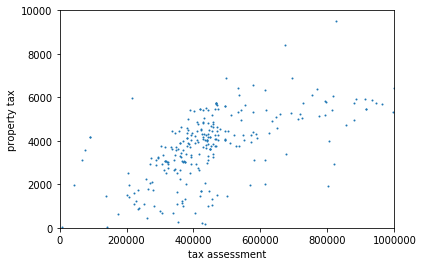

In [10]:
plt.scatter(df['taxAssessment'], df['propTax'], s=1)
plt.xlabel('tax assessment')
plt.ylabel('property tax')
plt.xlim(0, 1000000)
plt.ylim(0, 10000)

Property tax has modest positive correlation with tax assessment, but the variation is much greater than one would expect it should be. Need to cross-check the source and the definition of 'tax assessment'. 

(0, 10000)

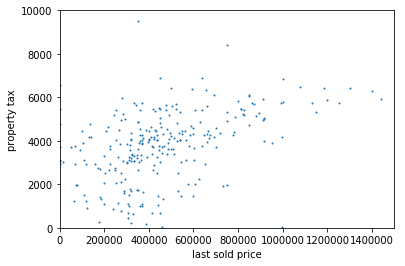

In [11]:
plt.scatter(df['lastSoldPrice'], df['propTax'], s=1)
plt.xlabel('last sold price')
plt.ylabel('property tax')
plt.xlim(0, 1500000)
plt.ylim(0, 10000)

The last sold price is ideally the best base value based upon which we can assess property tax, since it is officially recorded. But it can't be determined unless or until sold. An alternative strategy to determine the base value of each houses is, divide houses of similar specs into groups including both sold and unsold houses using unsupervised classification. In other words, automatize county assessor job through machine learning. Anyway, the correlation between the property tax and last sold price is much weaker than the previous comparison.

(0, 10000)

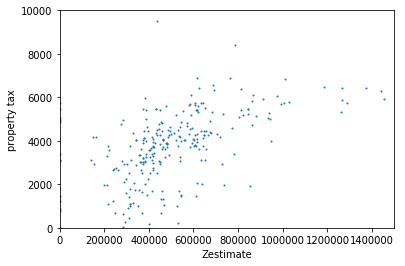

In [12]:
plt.scatter(df['Zestimate'], df['propTax'], s=1)
plt.xlabel('Zestimate')
plt.ylabel('property tax')
plt.xlim(0, 1500000)
plt.ylim(0, 10000)

'Zestimate' (estimate provided by Zillow with some unknown algorithm) doesn't help a lot.

Text(0,0.5,'tax assessment')

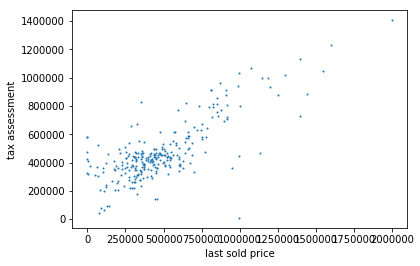

In [13]:
plt.scatter(df['lastSoldPrice'], df['taxAssessment'], s=1)
plt.xlabel('last sold price')
plt.ylabel('tax assessment')
# plt.xlim(0, 1500000)
# plt.ylim(0, 1500000)

Tax assessment vs. last sold price has quite strong correlations. Combined with the observations above, it seems that the base value of each house is reasonably estimated, but the property taxes are calculated incorrectly.

Text(0,0.5,'last sold price')

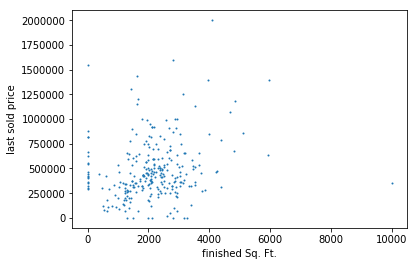

In [14]:
plt.scatter(df['finishedSqFt'], df['lastSoldPrice'], s=1)
plt.xlabel('finished Sq. Ft.')
plt.ylabel('last sold price')

House square footage doesn't seem to be the main factor in determining house price, unlike my expectation.

Text(0,0.5,'last sold price')

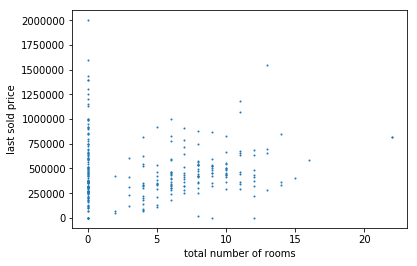

In [15]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
plt.scatter(df['total_rooms'], df['lastSoldPrice'], s=1)
plt.xlabel('total number of rooms')
plt.ylabel('last sold price')

Total number of rooms seems to be a better factor than the house square footage.